## 1. Explorar las ofertas relámpago, ¿qué insights puedes generar?


#### IMPORTACIÓN DEL DATASET

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargo el archivo CSV
ofertas = pd.read_csv(r'C:\Users\sfaija\Challenge_Data_Science\ofertas_relampago.csv')

# Muestro los primeros registros para tener una idea de la estructura del archivo
ofertas.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


Sabiendo que las columnas contienen la siguiente información:

OFFER_START_DATE: Fecha de inicio de la oferta.

OFFER_START_DTTM: Hora de inicio de la oferta.

OFFER_FINISH_DTTM: Hora de finalización de la oferta.

OFFER_TYPE: Tipo de oferta.

INVOLVED_STOCK: Stock involucrado en la oferta.

REMAINING_STOCK_AFTER_END: Stock restante después de que terminó la oferta.

SOLD_AMOUNT: Monto vendido durante la oferta.

SOLD_QUANTITY: Cantidad de unidades vendidas durante la oferta.

ORIGIN: Origen de la oferta.

SHIPPING_PAYMENT_TYPE: Tipo de pago de envío.

DOM_DOMAIN_AGG1: Dominio agregado (categoría).

VERTICAL: Vertical o subcategoría.

DOMAIN_ID: ID del dominio o categoría.

#### ANALISIS DESCRIPTIVO Y REVISIÓN DE NULOS PARA VISUALIZAR LA COMPOSICIÓN DE LOS DATOS 

Antes de realizar un análisis más profundo, voy a hacer un análisis descriptivo básico para comprender la distribución y calidad de los datos.

In [121]:
# analisis descriptivo
desc = ofertas.describe(include='all')
desc

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
count,48746,48746,48746,48746,48746.000000,48746.000000,24579.000000,24579.000000,11316,48746,48746,48746,48746
unique,61,783,7578,1,NaN,NaN,NaN,NaN,1,2,36,9,1266
top,2021-07-30,2021-07-30 13:00:00+00:00,2021-07-06 13:00:01+00:00,lightning_deal,NaN,NaN,NaN,NaN,A,free_shipping,HOME&DECOR,APP & SPORTS,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
freq,1300,414,77,48746,NaN,NaN,NaN,NaN,11316,26658,6742,13241,1759
mean,NaN,NaN,NaN,NaN,35.007508,30.565216,51.208898,10.851052,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,206.761058,195.813806,175.254414,45.475305,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,-192.000000,0.280000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,4.000000,5.730000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,10.000000,8.000000,12.420000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,15.000000,15.000000,30.925000,6.000000,NaN,NaN,NaN,NaN,NaN


A continuación voy a analizar que columnas cuentan con valores nulos

In [122]:
# Información sobre valores nulos
null_values = ofertas.isnull().sum()
null_values

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [123]:
# Analizo los tipos de datos de cada columna
tipos_de_datos = ofertas.dtypes
print(tipos_de_datos)

OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object


Cuento con 48746 registros en total, de los cuales 3 columnas (SOLD_AMOUNT, SOLD_QUANTITY y ORIGIN) presentan algunos datos nulos.

SOLD_AMOUNT y SOLD_QUANTITY al ser datos referidos a cantidades, realizaré el reemplazo de valor 0 cuando figura null.
En el caso de ORIGIN no realizaré nada por el momento salvo que visualice en el trascurso del trabajo la necesidad.

Para las primeras 3 columnas que son datos referidos a fechas, se encuentran em formato "object". Voy a convertirlas en datetime con el fin de poder realizar operaciones y analisis de series de tiempo de manera mas eficiente.

In [124]:
# Reemplazo los valores nulos en las columnas 'SOLD_AMOUNT', 'SOLD_QUANTITY' y 'ORIGIN' con 0
ofertas['SOLD_AMOUNT'].fillna(0, inplace=True)
ofertas['SOLD_QUANTITY'].fillna(0, inplace=True)
ofertas['ORIGIN'].fillna(0, inplace=True)

# Verifico si las columnas tienen registros nulos
columnas_con_nulos = ofertas[['SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN']].isnull().sum()

# Muestro la cantidad de registros nulos en cada columna
print(columnas_con_nulos)

SOLD_AMOUNT      0
SOLD_QUANTITY    0
ORIGIN           0
dtype: int64


Convierto las columnas en formato fecha para posteriormente hacer calculos con ellas

In [125]:
ofertas['OFFER_START_DATE'] = pd.to_datetime(ofertas['OFFER_START_DATE'], format='%Y-%m-%d')
ofertas['OFFER_START_DTTM'] = pd.to_datetime(ofertas['OFFER_START_DTTM'], format='%Y-%m-%d')
ofertas['OFFER_FINISH_DTTM'] = pd.to_datetime(ofertas['OFFER_FINISH_DTTM'], format='%Y-%m-%d')

tipos_de_datos = ofertas.dtypes
print(tipos_de_datos)

OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
OFFER_TYPE                                object
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
ORIGIN                                    object
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
dtype: object


A continuación voy a desarrollar un listado de preguntas con el fin de obtener los principales Insights


## 1) Análisis de Stock Involucrado:

Preguntas:
¿Cuanto stock suele participar en las ofertas relámpagos? 

C:\Users\sfaija\Anaconda3\lib\site-packages\seaborn\distributions.py:459: RuntimeWarning: invalid value encountered in multiply
  edges = edges[:-1] + (1 - shrink) / 2 * orig_widths


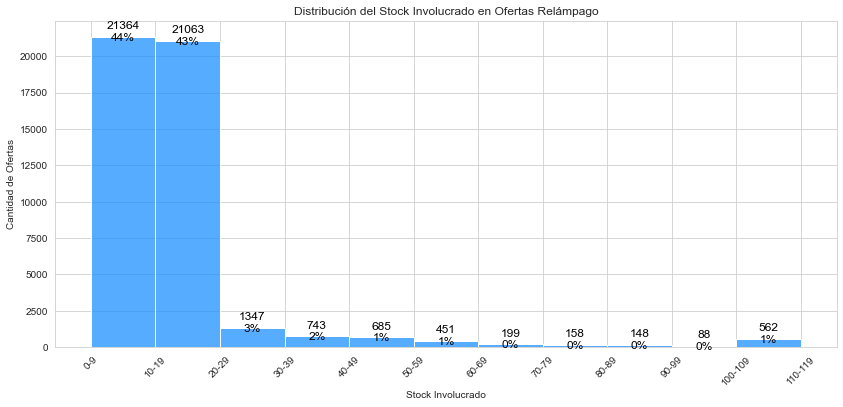

In [126]:
## crearé un histograma que muestre la distribucion del stock inicial involucrado en la oferta relampago.

#Importo las librerias que voy a utilizar para la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

#Defino la figura del grafico
plt.figure(figsize=(14, 6))

# Defino los límites de los rangos que representan los límites de los intervalos del histograma.
rangos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, float('inf')]

# Creo el histograma con la columna INVOLVED_STOCK
ax = sns.histplot(ofertas['INVOLVED_STOCK'], bins=rangos, color='dodgerblue', kde=False)

# Título y etiquetas de ejes
plt.title('Distribución del Stock Involucrado en Ofertas Relámpago')
plt.xlabel('Stock Involucrado')
plt.ylabel('Cantidad de Ofertas')

# Calculo el total de barras
total_barras = len(ofertas['INVOLVED_STOCK'])

# selecciono las etiquetas numericas y los porcentajes en las barras.
for p in ax.patches:
    if p.get_height() > 0:
        height = int(p.get_height())
        porcentaje = (height / total_barras) * 100
        ax.annotate(f'{height}\n{porcentaje:.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# configuro las etiquetas manualmente para que muestren los rangos en el formato "inicio-fin". Por ejemplo, "0-9", "10-19", etc.
x_ticks = [f'{i}-{i+9}' for i in rangos[:-1]]
plt.xticks(rangos[:-1], x_ticks, rotation=45, ha="center")

plt.show()

## INSIGHT:
Verifico que la gran mayoria de los productos que participaron contaban con poco stock durante el periodo de oferta. 
El 87% de los productos que participaron de la contaron con un stock Menor a 20 unidades. Un 8% se encuentra distribuido entre los intervalos de 20 a 99 y el 5% restante se encuentra entre >=100 unidades 

La gráfica muestra la distribución del stock involucrado en las ofertas relámpago. A continuación detallo algunas observaciones:

La mayoría de las ofertas relámpago involucran un stock pequeño, generalmente menos de 20 unidades.
A medida que el stock involucrado aumenta, la cantidad de ofertas tiende a disminuir.

## 2) Análisis sobre duración en horas de las ofertas:
Pregunta: cuanto es la duración en horas de las ofertas relampagos?

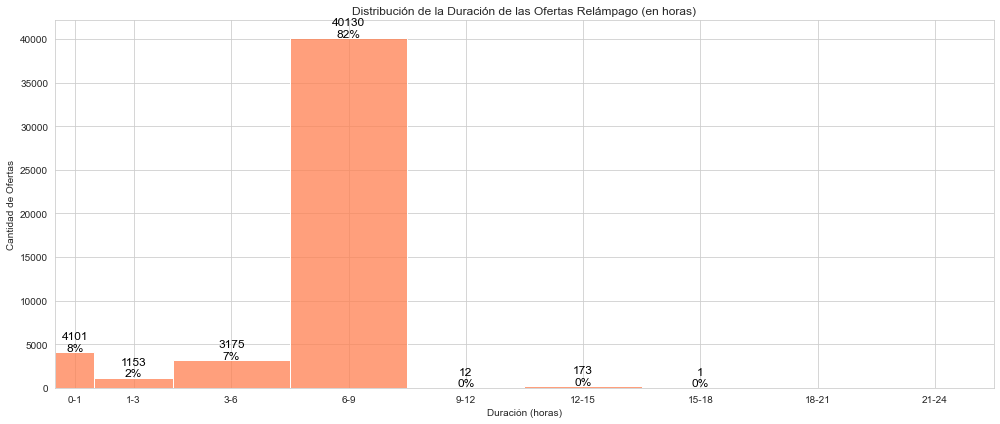

In [127]:
##Este código tiene un propósito similar al anterior, pero con un enfoque diferente. 
##En este caso, se visualiza la duración de las "Ofertas Relámpago" en horas. Desglosaré el código paso a paso:

plt.figure(figsize=(14, 6))

# Defino los límites de los rangos
bins_new_scale = [0, 1, 3, 6, 9, 12, 15, 18, 21, 24]

# Calculo la duración en horas y creo la columna 'DURATION_HOURS' (La duración se convierte a segundos y luego se divide por 3600 para obtener horas)
ofertas['START_TIME'] = pd.to_datetime(ofertas['OFFER_START_DTTM']) 
ofertas['END_TIME'] = pd.to_datetime(ofertas['OFFER_FINISH_DTTM'])
ofertas['DURATION_HOURS'] = (ofertas['END_TIME'] - ofertas['START_TIME']).dt.total_seconds() / 3600.0


# creacion del Histograma con los rangos especificados
ax = sns.histplot(ofertas['DURATION_HOURS'], bins=bins_new_scale, color='coral')

plt.title('Distribución de la Duración de las Ofertas Relámpago (en horas)')
plt.xlabel('Duración (horas)')
plt.ylabel('Cantidad de Ofertas')

##configuro el eje para que muestre de 0 a 24 horas.
plt.xlim(0, 24)
plt.xticks(ticks=[0.5, 2, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5],
           labels=['0-1', '1-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24'])

# Calculo el total de barras
total_barras = len(ofertas['DURATION_HOURS'])

# Aumento el tamaño de las etiquetas numéricas y agregar el porcentaje
for p in ax.patches:
    if p.get_height() > 0:
        height = int(p.get_height())
        porcentaje = (height / total_barras) * 100
        ax.annotate(f'{int(p.get_height())}\n{porcentaje:.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),  # Aumentamos el tamaño de fuente aquí
                    textcoords='offset points')

plt.tight_layout()
plt.show()

### INSIGHT ENCONTRADO: 
Verifico que el 99% de las ofertas relámpago tienen una duración de entre 0 y 10 horas. Hay un pico pronunciado en ofertas que duran alrededor de 6 a 9 horas que representa el 82%.

Se verifica que medida que la duración de la oferta aumenta, la cantidad de ofertas tiende a disminuir.

## 3) Stock vendido durante la campaña:
Pregunta: Cuanto es el total del stock que se vendió durante la campaña?

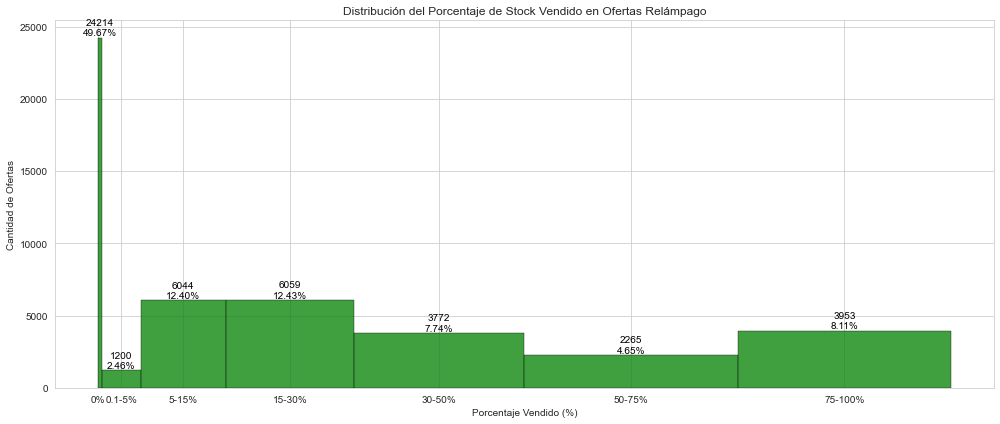

In [128]:

# Configuro el estilo de Seaborn
sns.set_style('whitegrid')  

# Cálculo del porcentaje del stock vendido
ofertas['PERCENTAGE_SOLD'] = (ofertas['SOLD_QUANTITY'] / ofertas['INVOLVED_STOCK']) * 100

# Configuración del tamaño de la figura y creación del histograma 

plt.figure(figsize=(14, 6))

# Define el rango de bins con intervalos más anchos
bins = [0, 0.5, 5, 15, 30, 50, 75, 100]
ax = sns.histplot(ofertas['PERCENTAGE_SOLD'], bins=bins, color='green', edgecolor='black')

plt.title('Distribución del Porcentaje de Stock Vendido en Ofertas Relámpago')
plt.xlabel('Porcentaje Vendido (%)')
plt.ylabel('Cantidad de Ofertas')

# Calculo el total de barras
total_barras = len(ofertas['PERCENTAGE_SOLD'])

# Configuro etiquetas del eje x manualmente , con la escala que considero optima para visualizar el comprotamiento
x_labels = ['0%', '0.1-5%', '5-15%', '15-30%', '30-50%', '50-75%', '75-100%']
plt.xticks([0, 2.75, 10, 22.5, 40, 62.5, 87.5], x_labels)

# Aumentar el tamaño de las etiquetas numéricas y agregar el valor y el porcentaje
for p in ax.patches:
    if p.get_height() > 0:
        valor = int(p.get_height())
        porcentaje = (valor / total_barras) * 100
        ax.annotate(f'{valor}\n{porcentaje:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

La gráfica muestra la distribución del porcentaje de stock vendido durante las ofertas relámpago. 

### INSIGHT ENCONTRADO: 
El 50% de los productos no vendió ninguna unidad (% stock vendido fue 0%) Lo que significa que este tipo de ofertas no ayudó a rotar el producto.

Sin embargo, también hay un pico significativo de ofertas donde se vende el 100% del stock involucrado, lo que indica que estas ofertas fueron totalmente exitosas para ese grupo.
En general, parece haber una distribución bimodal, con picos en ambos extremos: ofertas poco exitosas y ofertas muy exitosas.

## 4) Análisis segun el tipo de envio:
Pregunta: Presenta alguna relevancia (mayor nivel de ventas) el tipo de envio en estas ofertas?

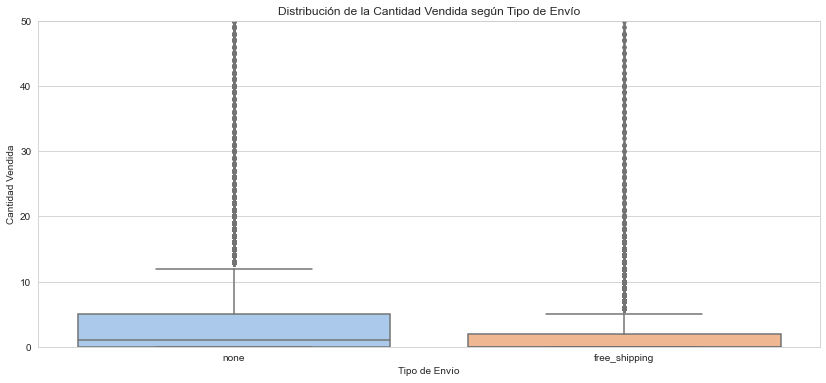

In [129]:
# Comparación de la cantidad vendida según el tipo de envío. Para eso voy a crear un boxplot

plt.figure(figsize=(14, 6))
sns.boxplot(data=ofertas, x='SHIPPING_PAYMENT_TYPE', y='SOLD_QUANTITY', palette='pastel')
plt.title('Distribución de la Cantidad Vendida según Tipo de Envío')
plt.xlabel('Tipo de Envío')
plt.ylabel('Cantidad Vendida')
plt.ylim(0, 50)  # Limito el eje y para mejor visualización
plt.show()

La gráfica muestra boxplots de la cantidad vendida en función del tipo de envío (gratuito o no). 

### INSIGHT ENCONTRADO: 
Las ofertas con "envío gratuito" tienden a tener una mediana de cantidad vendida más alta en comparación con las ofertas donde el envío no es gratuito.
La dispersión de las ventas es similar entre ambos tipos de envío, pero se observa una mayor cantidad de ofertas con ventas altas (outliers) en el caso de "envío gratuito".
En general, parece que el "envío gratuito" puede tener un impacto positivo en la cantidad vendida durante las ofertas relámpago.

## 5) Análisis segun vertical:
Pregunta: Hay alguna vertical que presente mayor participacion en estas campañas?

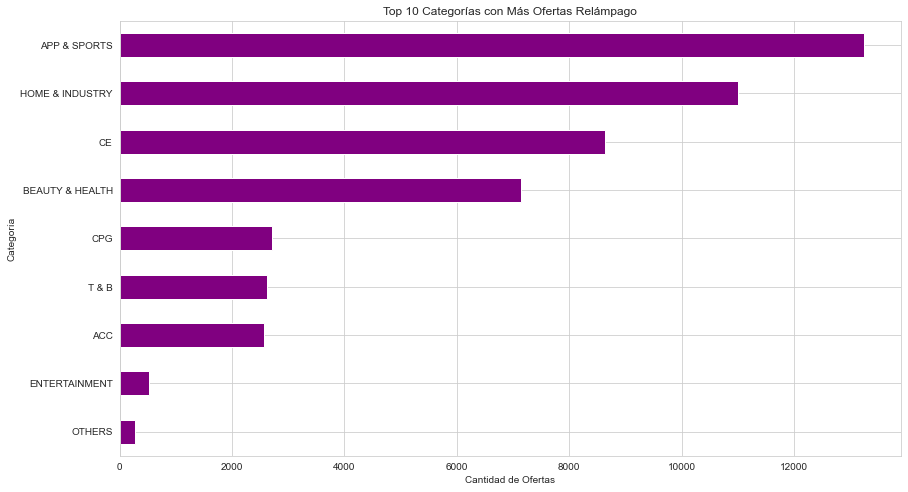

In [130]:
# Top 10 verticales con más ofertas relámpago
top_domains = ofertas['VERTICAL'].value_counts().head(10)

# Gráfica de los dominios con más ofertas
plt.figure(figsize=(14, 8))
top_domains.plot(kind='barh', color='purple')
plt.title('Top 10 Categorías con Más Ofertas Relámpago')
plt.xlabel('Cantidad de Ofertas')
plt.ylabel('Categoría')
plt.gca().invert_yaxis()  # Invertir el eje y para mejor visualización
plt.show()

La gráfica muestra las 10 categorías con la mayor cantidad de ofertas relámpago. 


### INSIGHT ENCONTRADO: 
La vertical con mayor participacion de la campaña es APP Sport, es decir, que la gran mayor cantidad de los productos son de esta vertical (no quiere decir que sea la mayor cantidad del stock, esto lo voy a analizar en el siguiente punto)

## 6) Análisis de ventas por vertical:
Pregunta: hay alguna vertical que concentra el mayor nivel de ventas?
Estas ofertas resultaron mejor para algun tipo de vertical?


C:\Users\sfaija\AppData\Local\Temp/ipykernel_23956/2935965757.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_verticals_ofertas_sorted_desc.index, rotation=45, ha='right', color='black')


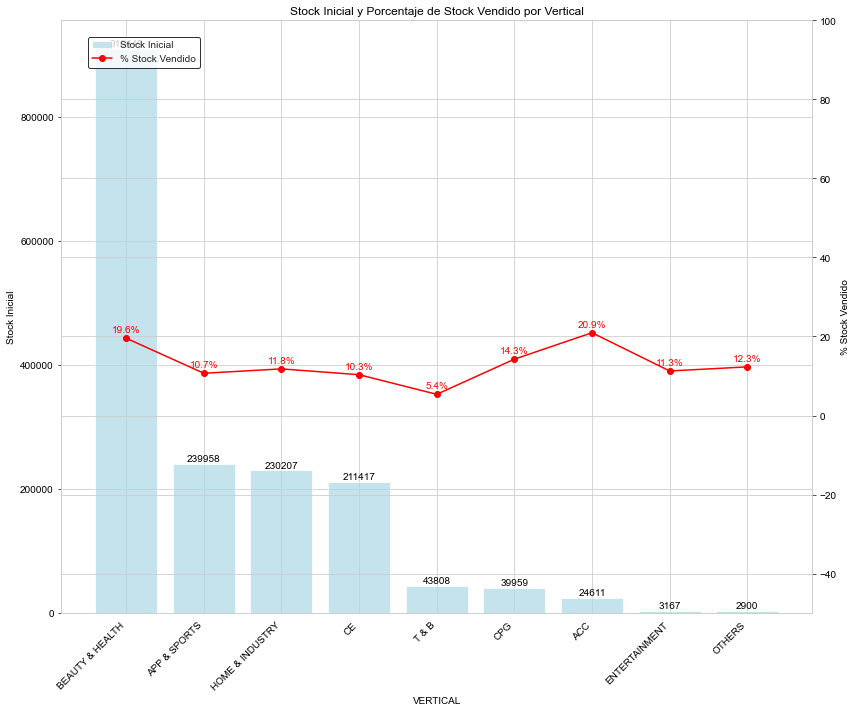

In [131]:
# Ajusto la escala de los ejes para asegurar que todas las etiquetas y datos sean visibles en el gráfico

fig, ax1 = plt.subplots(figsize=(12,10))

# Gráfico de barras para el stock inicial

bars_stock = ax1.bar(top_verticals_ofertas_sorted_desc.index, top_verticals_ofertas_sorted_desc['INVOLVED_STOCK'], label='Stock Inicial', alpha=0.7, color='lightblue')
ax1.set_xlabel('VERTICAL', color='black')
ax1.set_ylabel('Stock Inicial', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelcolor='black')
ax1.set_title('Stock Inicial y Porcentaje de Stock Vendido por Vertical', color='black')

# Creación del segundo eje y y gráfico de línea para el porcentaje de stock vendido
ax2 = ax1.twinx()
ax2.set_ylim(-50, 100)  # Ajusto la escala para que el máximo sea 110% y acomodar las etiquetas

# calculo el porcentaje de stock vendido
line_sold = ax2.plot(top_verticals_ofertas_sorted_desc.index, percentage_sold_sorted_desc, label='% Stock Vendido', color='red', marker='o')
ax2.set_ylabel('% Stock Vendido', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Añado etiquetas de cantidad de stock inicial y % de ventas
for bar, percent in zip(bars_stock, percentage_sold_sorted_desc):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{int(yval)}', ha='center', va='bottom', color='black')
    ax2.text(bar.get_x() + bar.get_width()/2, percent + 1, f'{percent:.1f}%', ha='center', va='bottom', color='red')

# Roto las etiquetas del eje x para una mejor visualización
ax1.set_xticklabels(top_verticals_ofertas_sorted_desc.index, rotation=45, ha='right', color='black')

# Muestro las leyendas
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95), facecolor='white', edgecolor='black', fontsize='medium')

plt.show()


### INSIGHT ENCONTRADO: 
La vertical con mayor participación de stock fue Beauty & Health.
Si analizamos el % de stock que se logró vender vs. el stock inicial, se destaca especialmente "Beauty & Health" como "ACC".
Esto nos quiere decir que este tipo de ofertas relampago tiene una buena performance para estas 2 verticales mencionadas.

## 7) Evolución de las ventas y total stock en el transcurso de la campaña:
Pregunta: Siempre se vendió la misma cantidad de unidades? Tiene alguna relacion con el nivel de stock que se contaba ?


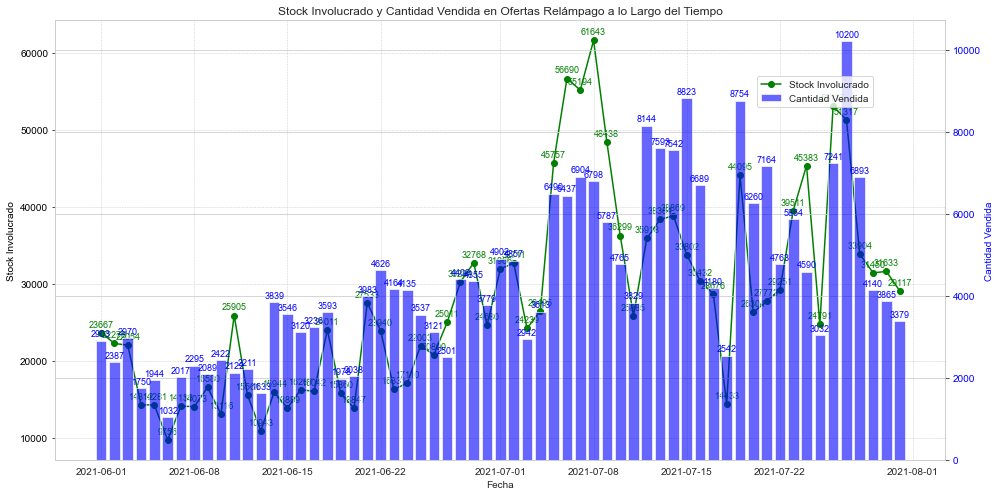

In [132]:
# sumo la cantidad vendida de unidades pro cada fecha de la campaña-
sold_by_date = ofertas.groupby('OFFER_START_DATE')['SOLD_QUANTITY'].sum().reset_index()

# Combino los dataframes para tener INVOLVED_STOCK y SOLD_QUANTITY juntos. 
combined_by_date = pd.merge(stock_by_date, sold_by_date, on='OFFER_START_DATE')

# creo un grafico combinado, de barras y lineas que permita mostrar INVOLVED_STOCK y SOLD_QUANTITY a lo largo del tiempo con etiquetas
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfica lineal para INVOLVED_STOCK
ax1.plot(combined_by_date['OFFER_START_DATE'], combined_by_date['INVOLVED_STOCK'], color='green', label='Stock Involucrado', marker='o')

# Añado etiquetas para INVOLVED_STOCK
for date, stock in zip(combined_by_date['OFFER_START_DATE'], combined_by_date['INVOLVED_STOCK']):
    ax1.text(date, stock + 500, str(int(stock)), ha='center', va='bottom', color='green', fontsize=9)

# Configuro el eje y primario
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Stock Involucrado', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_title('Stock Involucrado y Cantidad Vendida en Ofertas Relámpago a lo Largo del Tiempo')

# Creo el eje y secundario para SOLD_QUANTITY
ax2 = ax1.twinx()
# Gráfica de barras para SOLD_QUANTITY
bars = ax2.bar(combined_by_date['OFFER_START_DATE'], combined_by_date['SOLD_QUANTITY'], label='Cantidad Vendida', alpha=0.6, color='blue')

# Añado etiquetas para SOLD_QUANTITY
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height + 50, str(int(height)), ha='center', va='bottom', color='blue', fontsize=9)

# Configuro el eje y secundario
ax2.set_ylabel('Cantidad Vendida', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Ajusto la visualización y mostrar la leyenda
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.75, 0.85))
plt.xticks(rotation=45)
plt.show()


En esta grafica podemos ver que tuvimos un crecimiento con el transcurso de los dias del total stock y por lo tanto aumentaron las ventas. 

La gráfica muestra las tendencias de las ofertas relámpago a lo largo del tiempo en términos de cantidad de ofertas y cantidad vendida promedio por día. Detallo algunas observaciones adicionales:

Cantidad de ventas: Se observa una tendencia creciente en la cantidad de ventas relámpago a lo largo del tiempo, con algunos picos notables en ciertas fechas.
Cantidad Vendida Promedio: Aunque hay una tendencia creciente en la cantidad de ofertas, la cantidad vendida promedio por día fluctúa y no muestra un patrón claro. Hay días con un alto promedio de ventas y otros con un promedio más bajo.

## 8) Analisis Ventas por dia de la semana

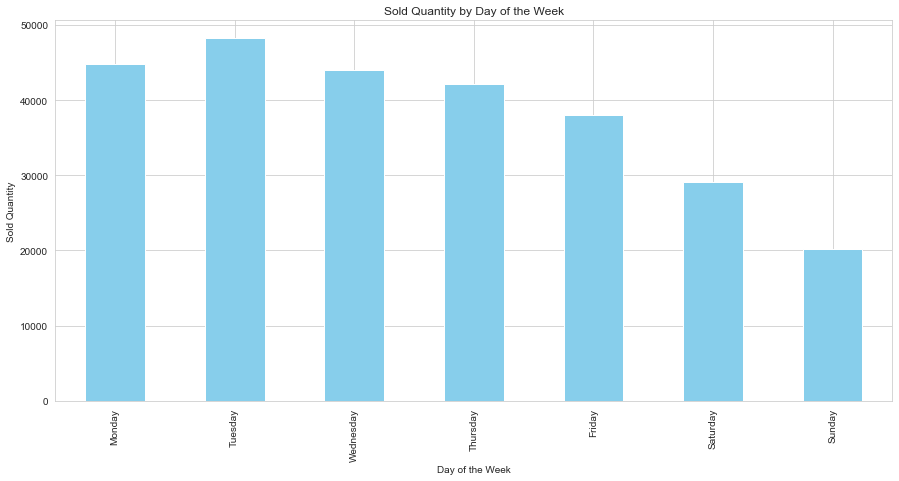

In [146]:
# Extraigo el día de la semana
ofertas['day_of_week'] = ofertas['OFFER_START_DATE'].dt.day_name()

# Agrupo por día de la semana y obtener la suma de SOLD_QUANTITY
grouped_by_day = ofertas.groupby('day_of_week')['SOLD_QUANTITY'].sum()

# Ordeno los días de la semana
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_by_day = grouped_by_day.reindex(ordered_days)

# Visualizo
grouped_by_day.plot(kind='bar', figsize=(15, 7), color='skyblue')
plt.title('Sold Quantity by Day of the Week')
plt.ylabel('Sold Quantity')
plt.xlabel('Day of the Week')
plt.show()


Vemos que la mayor cantidad de ventas se suelen dar los primeros dias de la semana especialmente Martes y luego comienza a disminuir las ventas los dias siguientes. Esto es muy importante saberlo ya que si se desea hacer una accion importante que pueda afectar las ventas, si se realiza este dia se puede perder grandes volumenes de ganancias

## 9) Analisis Ventas por hora

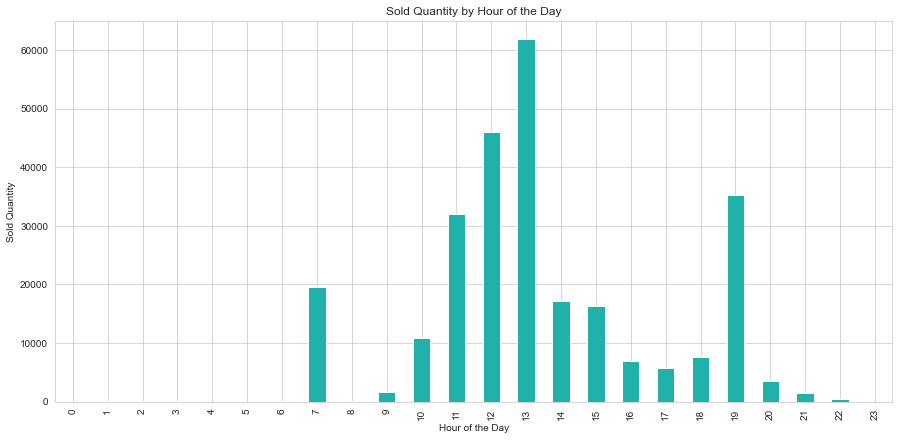

In [151]:
# convierto  'OFFER_START_DTTM' to datetime
ofertas['OFFER_START_DTTM'] = pd.to_datetime(ofertas['OFFER_START_DTTM'])

# extraigo la hora del dia
ofertas['hour_of_day'] = ofertas['OFFER_START_DTTM'].dt.hour

# agrupo por hora y sumo las ventas
grouped_by_hour = ofertas.groupby('hour_of_day')['SOLD_QUANTITY'].sum()

# Para visualizar el grafico
grouped_by_hour.plot(kind='bar', figsize=(15, 7), color='lightseagreen')
plt.title('Sold Quantity by Hour of the Day')
plt.ylabel('Sold Quantity')
plt.xlabel('Hour of the Day')
plt.show()


Se puede ver que la mayor cantidad de ventas se realiza en el itnervalo de 11 a 13 pm y en el intervalo de 19pm. Esto puede presentar diferencias segun el dia de la semana, pero es bueno saber cuando se encuentra el mayor pico de ventas, para garantizar que en esos horarios no haya problemas en las aplicaciones de MELI

Estos fueron los principales insights sobre las Ofertas Relámpago. Se podrían hacer mas analisis como quisieramos por ejemplo:

¿cual es el tiempo ideal que debe durar este tipo de ofertas?
Qué productos suelen quedarse sin stock más rápidamente?
Hay productos o categorías que regularmente aparecen en las ofertas relámpago?